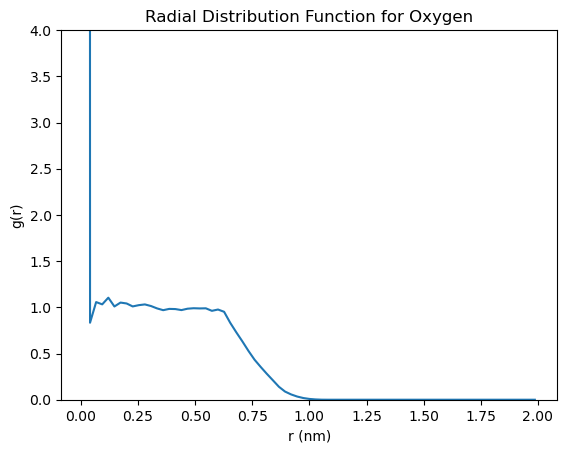

In [29]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf

# Load the .xyz file (structure file and trajectory file are the same in this case)
u = mda.Universe('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water.xyz', '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz')  # 假设 'topology.xyz' 是结构文件，'trajectory.xyz' 是轨迹文件

# Check if box size is available
if u.dimensions is None:
    print("Warning: Box size not found in the trajectory. Using a default box size of 1.24 nm x 1.24 nm x 1.24 nm.")
    box_size = np.array([1.24, 1.24, 1.24])  # Default box size in nanometers
    u.dimensions = np.concatenate([box_size, [90.0, 90.0, 90.0]])  # Assuming a cubic box with 90 degree angles
else:
    box_size = u.dimensions[:3]  # Box size from trajectory
    print("Box size from trajectory:", box_size)

# Select oxygen atoms
oxy_atoms = u.select_atoms('name O')

# Compute RDF for oxygen atoms
rdf_analysis = rdf.InterRDF(oxy_atoms, oxy_atoms, range=(0.0, 2.0), bins=100)

# Run the RDF calculation
rdf_analysis.run()

# Access results using `results`
bins = rdf_analysis.results.bins
rdf_values = rdf_analysis.results.rdf

# Plot the g(r) vs r
plt.plot(bins, rdf_values)
plt.xlabel('r (nm)')
plt.ylabel('g(r)')
plt.ylim(0, 4) 
plt.title('Radial Distribution Function for Oxygen')
plt.savefig('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Figures/water_RDF.png')
plt.show()


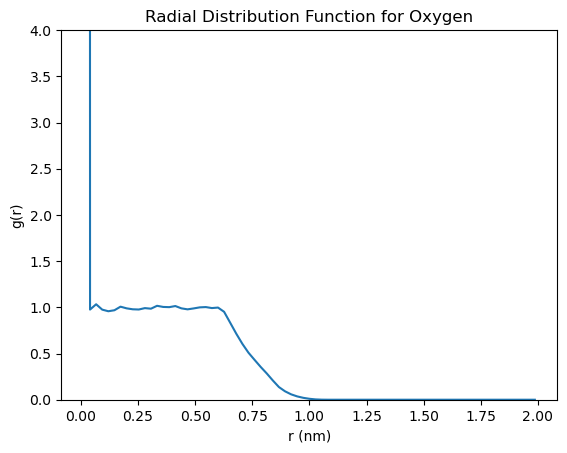

In [30]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf

# Load the .xyz file (structure file and trajectory file are the same in this case)
u = mda.Universe('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Proton/proton.xyz', '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Proton/proton_aimd_1ns_every0.5fs-pos-1.xyz')
# Check if box size is available
if u.dimensions is None:
    print("Warning: Box size not found in the trajectory. Using a default box size of 1.24 nm x 1.24 nm x 1.24 nm.")
    box_size = np.array([1.24, 1.24, 1.24])  # Default box size in nanometers
    u.dimensions = np.concatenate([box_size, [90.0, 90.0, 90.0]])  # Assuming a cubic box with 90 degree angles
else:
    box_size = u.dimensions[:3]  # Box size from trajectory
    print("Box size from trajectory:", box_size)

# Select oxygen atoms
oxy_atoms = u.select_atoms('name O')

# Compute RDF for oxygen atoms
rdf_analysis = rdf.InterRDF(oxy_atoms, oxy_atoms, range=(0.0, 2.0), bins=100)

# Run the RDF calculation
rdf_analysis.run()

# Access results using `results`
bins = rdf_analysis.results.bins
rdf_values = rdf_analysis.results.rdf

# Plot the g(r) vs r
plt.plot(bins, rdf_values)
plt.xlabel('r (nm)')
plt.ylabel('g(r)')
plt.ylim(0, 4) 
plt.title('Radial Distribution Function for Oxygen')
plt.savefig('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Figures/proton_RDF.png')
plt.show()